## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [219]:
import pandas as pd
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import EDA_func_mid_proj as eda

In [221]:
importlib.reload(eda)

<module 'EDA_func_mid_proj' from 'C:\\Users\\hp\\Desktop\\Jupyter_notebooks\\EDA_func_mid_proj.py'>

## Загальний огляд даних

In [13]:
bank_df = pd.read_csv('bank-additional-full.csv', sep=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
bank_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
bank_df.shape

(41188, 21)

In [19]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [23]:
bank_df.select_dtypes(include = "object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [25]:
unknown_counts = (bank_df == "unknown").sum()
unknown_ratio = (bank_df == "unknown").mean().round(3)

unknown_summary = pd.DataFrame({
    "count_unknown": unknown_counts,
    "ratio_unknown": unknown_ratio
}).sort_values(by="ratio_unknown", ascending=False)
print(unknown_summary)

                count_unknown  ratio_unknown
default                  8597          0.209
education                1731          0.042
housing                   990          0.024
loan                      990          0.024
job                       330          0.008
marital                    80          0.002
age                         0          0.000
poutcome                    0          0.000
nr.employed                 0          0.000
euribor3m                   0          0.000
cons.conf.idx               0          0.000
cons.price.idx              0          0.000
emp.var.rate                0          0.000
duration                    0          0.000
previous                    0          0.000
pdays                       0          0.000
campaign                    0          0.000
day_of_week                 0          0.000
month                       0          0.000
contact                     0          0.000
y                           0          0.000


In [28]:
bank_df=bank_df[~bank_df.duplicated()] 

In [32]:
bank_df['y'].value_counts(normalize = True).sort_values(ascending = False) * 100

y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64

## Аналіз числових ознак

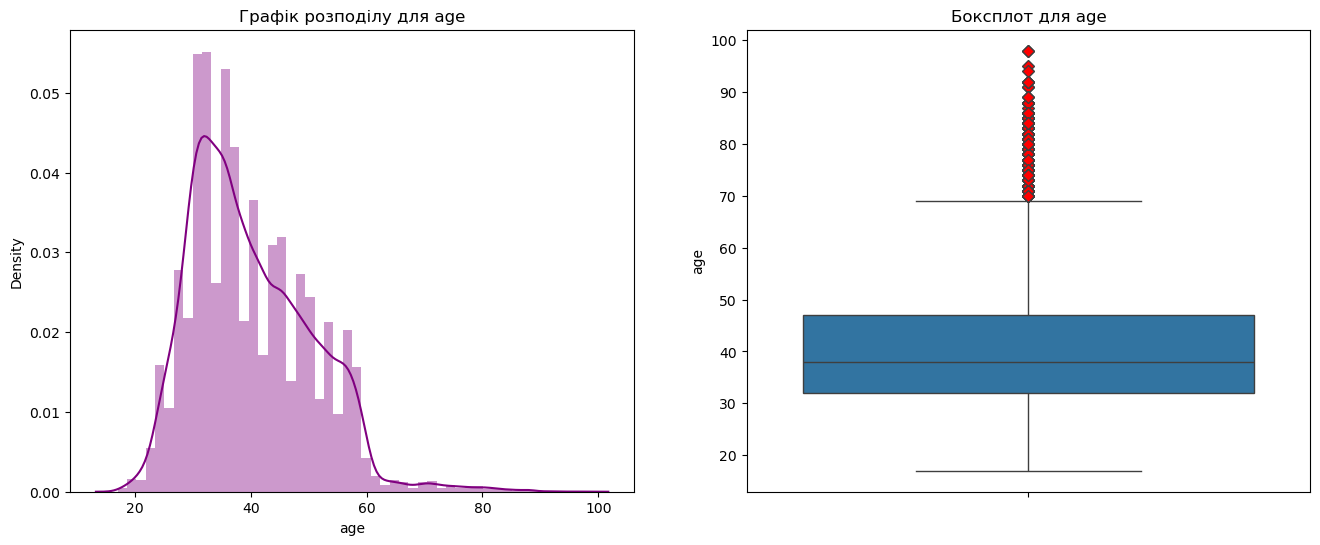

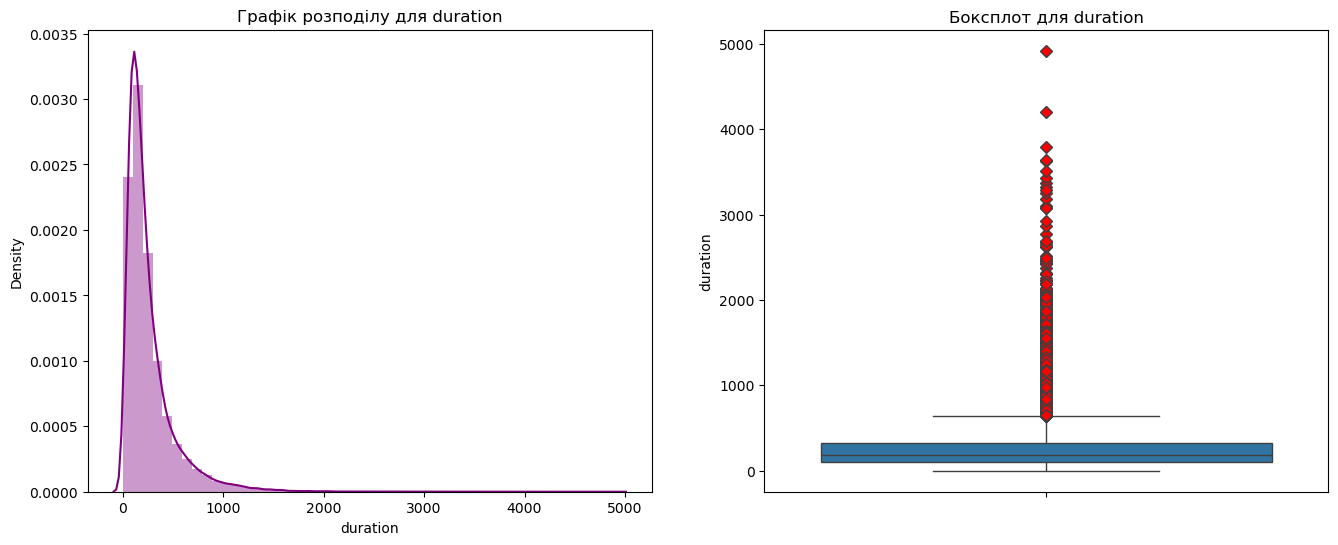

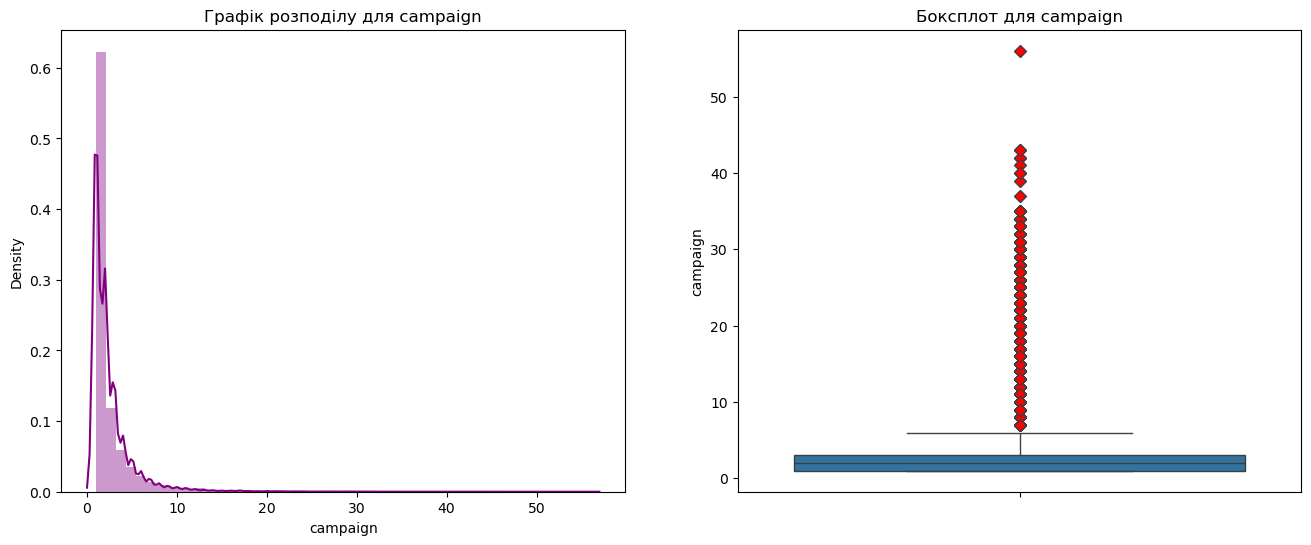

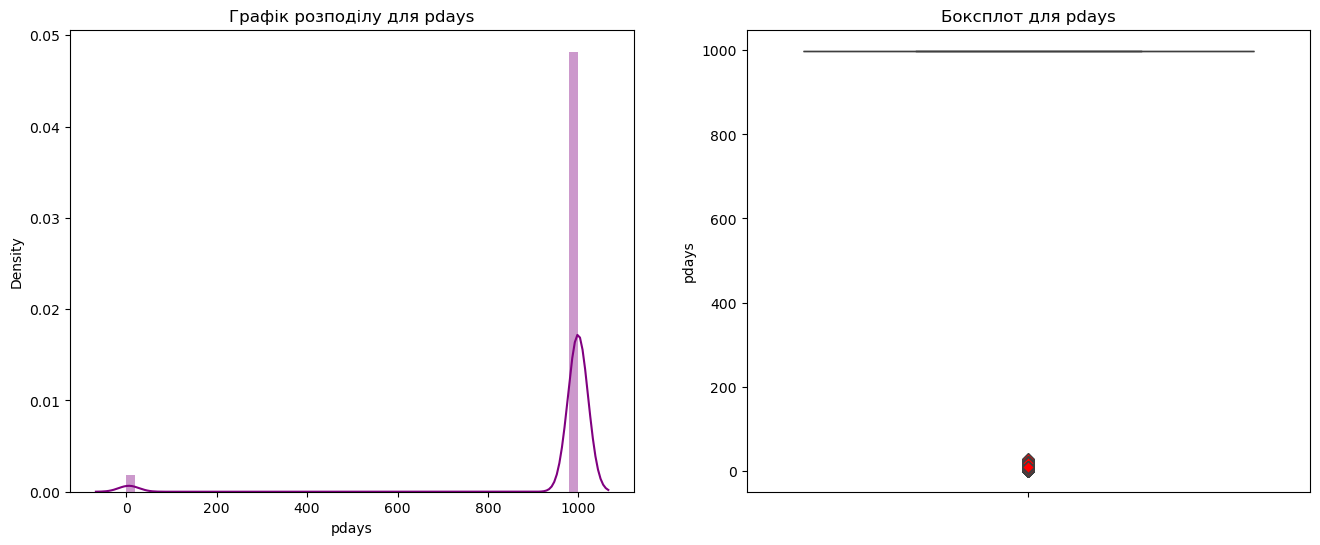

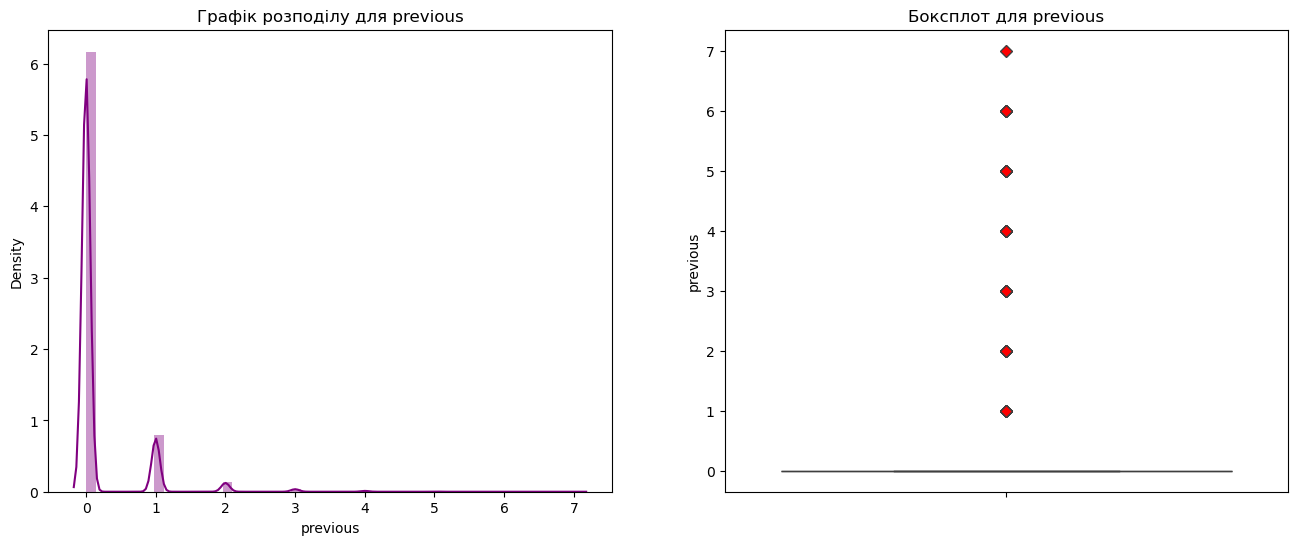

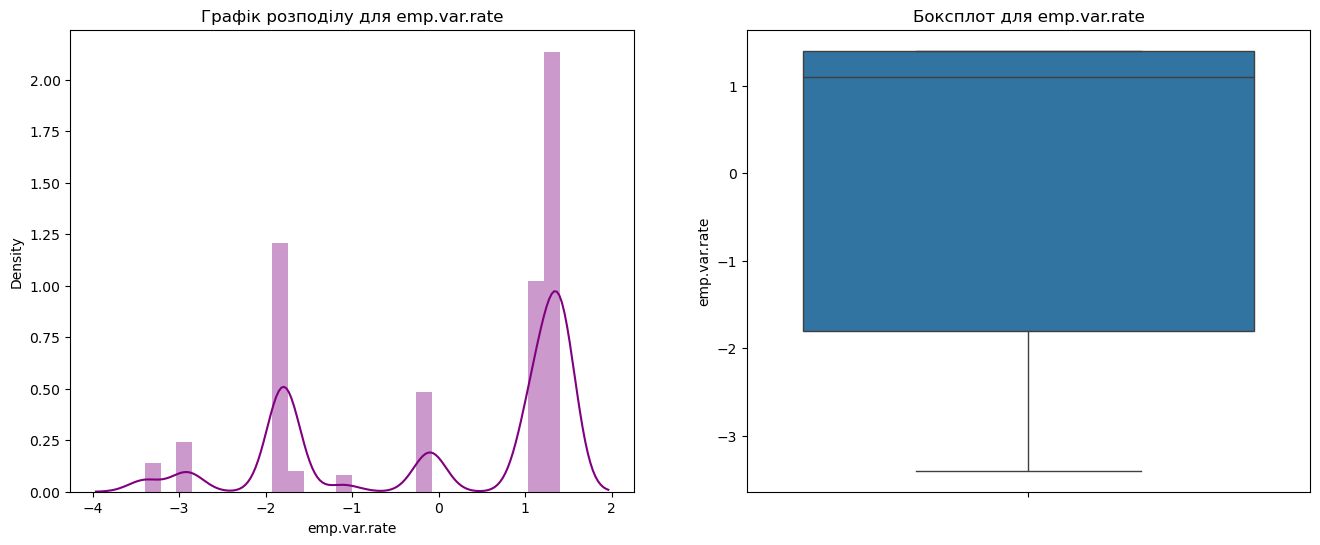

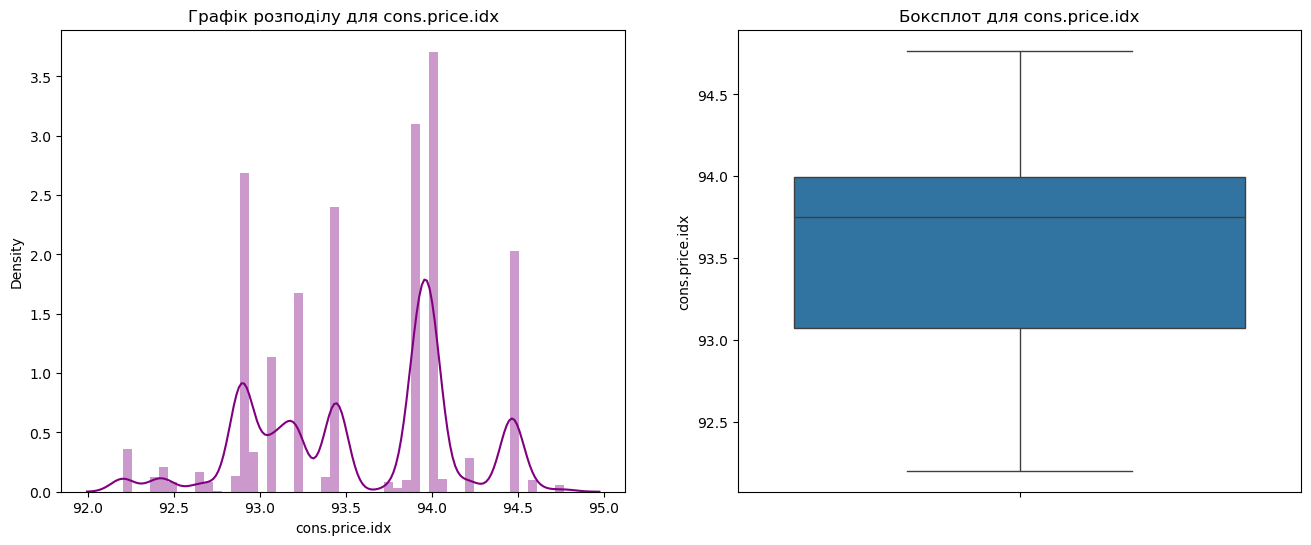

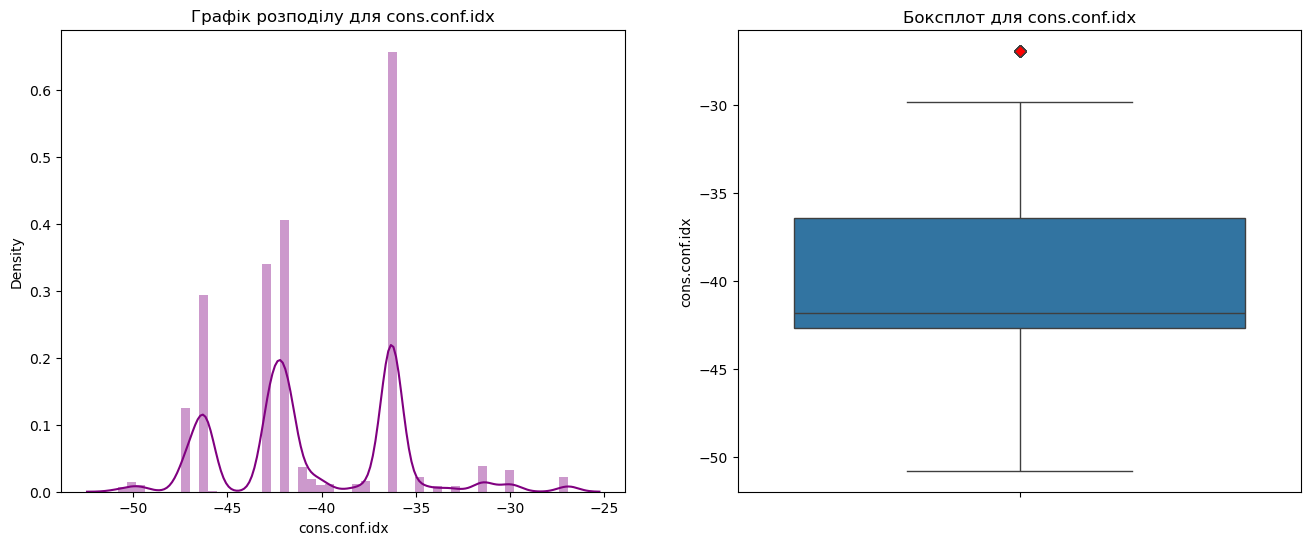

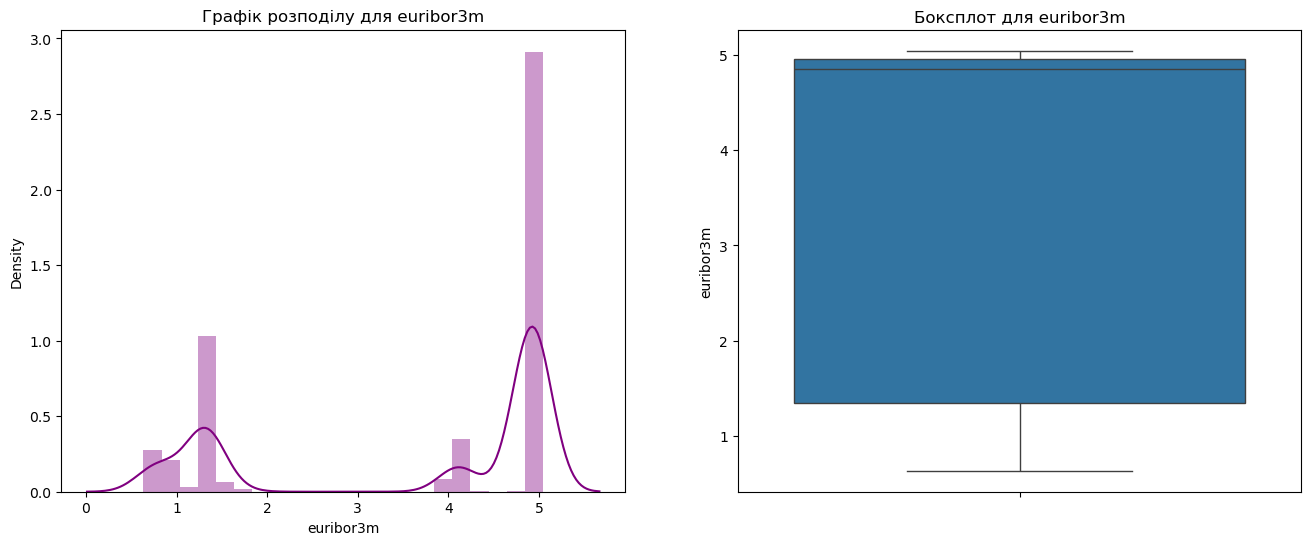

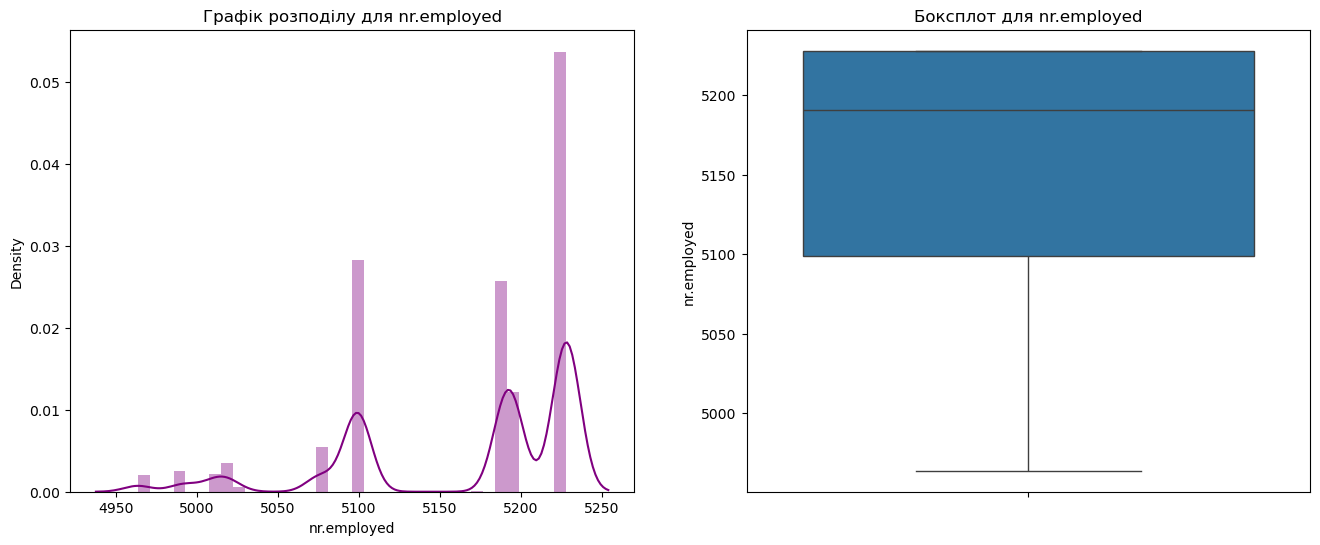

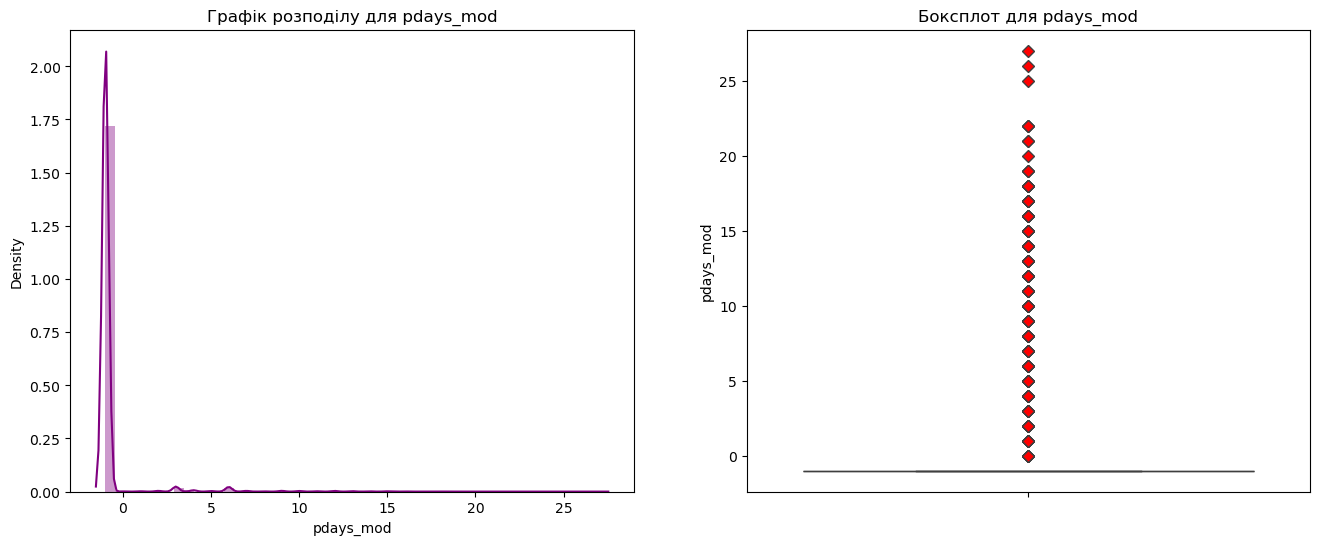

In [215]:
# Определяем числовые признаки
num_cols = bank_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Применяем dist_box ко всем числовым колонкам
for col in num_cols:
    eda.dist_box(bank_df, col)

Загальний огляд розподілу числових ознак, я не бачу багато аномальних викидів, які дуже впливають на розподіл. Але можна повернутись до цього пізніше і провести декілька експерементів.

Далі подивимось розподіл числових ознак в залежності від цільової змінної

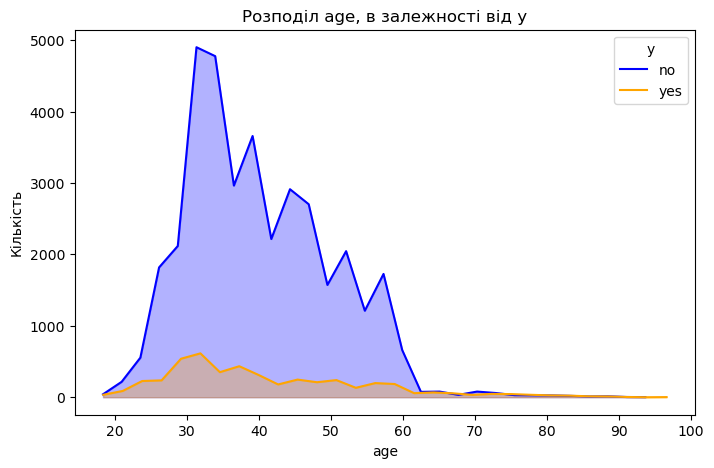

In [223]:
eda.freqline_by_target_count(bank_df, 'age', target='y')

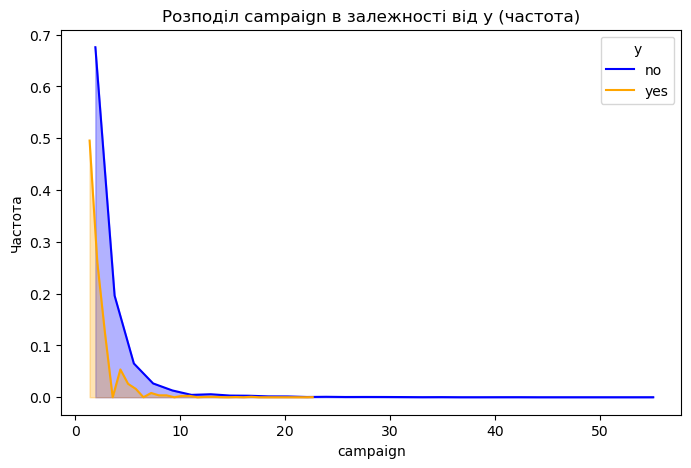

In [225]:
eda.freqline_by_target(bank_df, 'campaign', target='y')

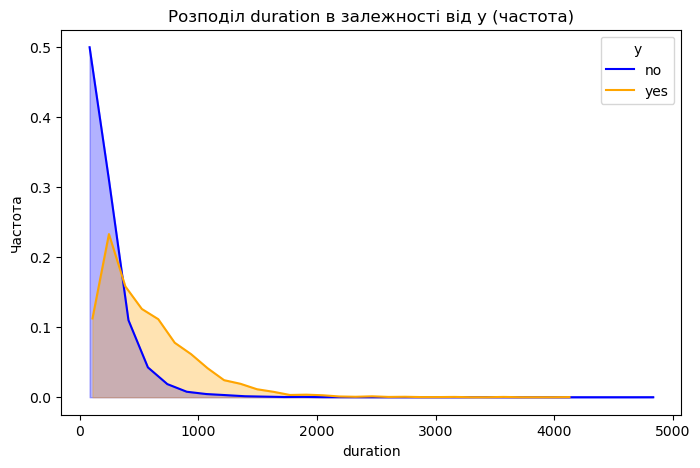

In [227]:
eda.freqline_by_target(bank_df, 'duration', target='y')

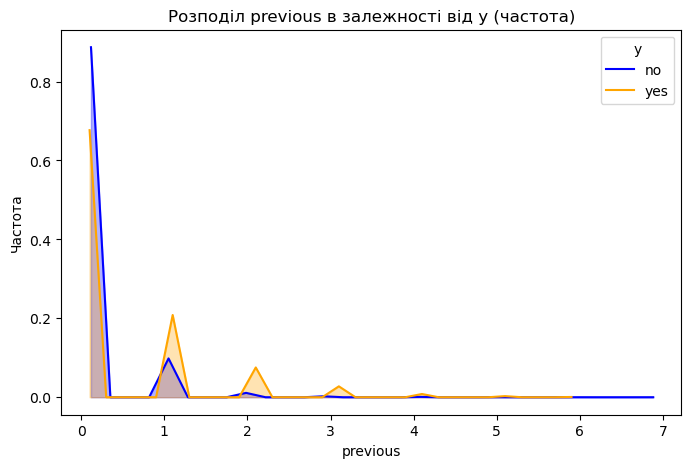

In [229]:
eda.freqline_by_target(bank_df, 'previous', target='y')

In [80]:
bank_df['pdays_mod'] = bank_df['pdays'].replace(999, -1)

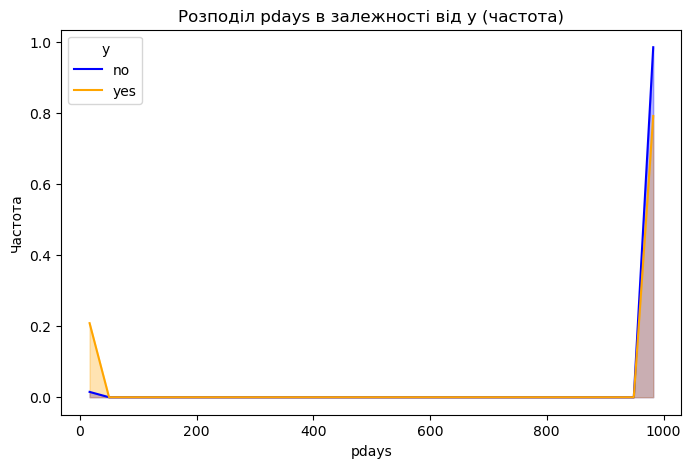

In [231]:
eda.freqline_by_target(bank_df, 'pdays', target='y')

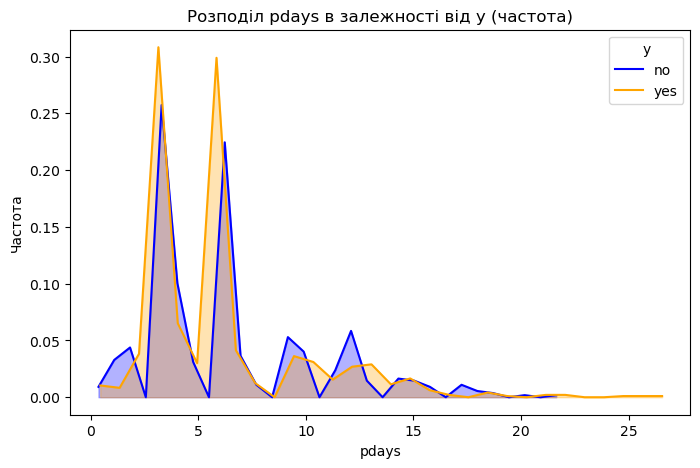

In [233]:
bank_df_no999 = bank_df[bank_df['pdays'] != 999]

eda.freqline_by_target(bank_df_no999, 'pdays', target='y')

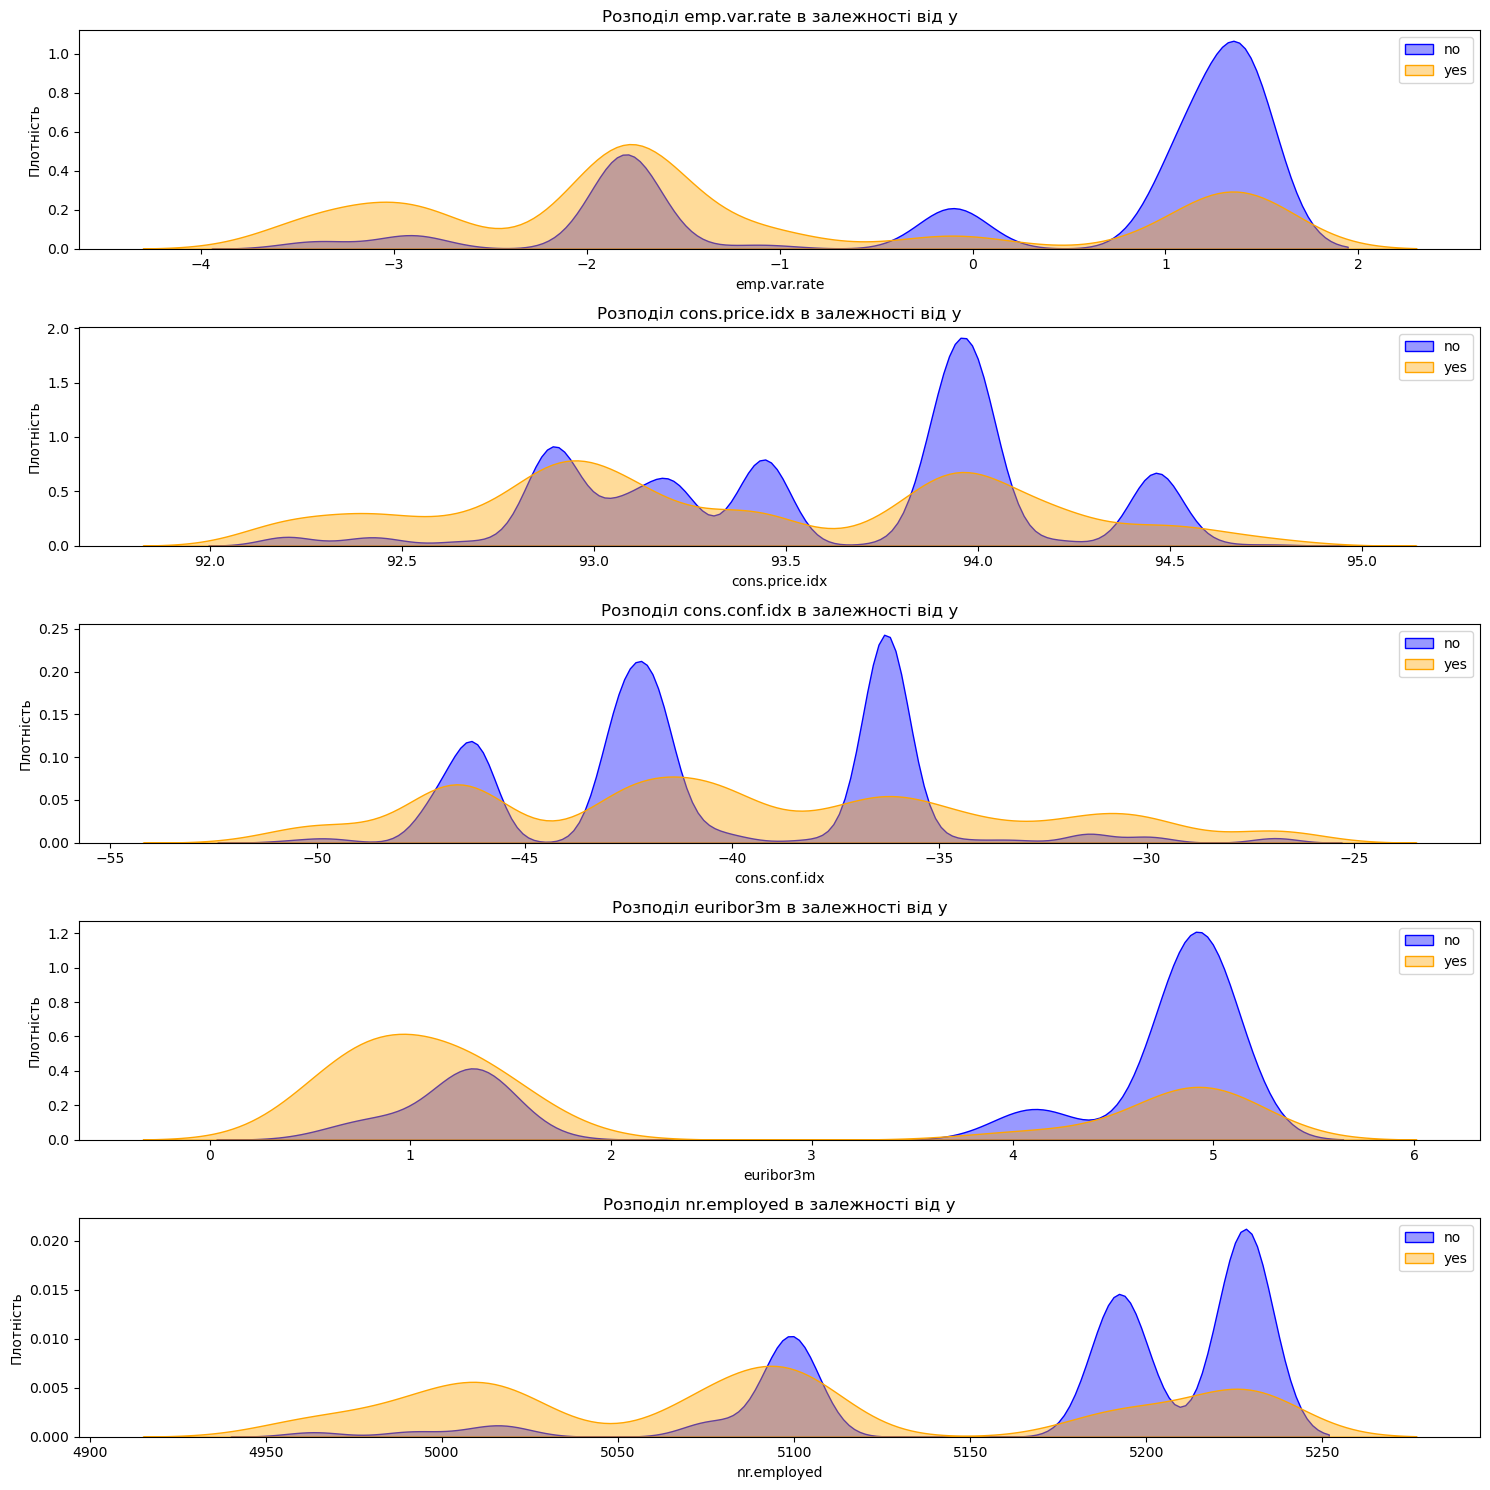

In [235]:
macro_features = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

eda.plot_macro_features(bank_df, macro_features)

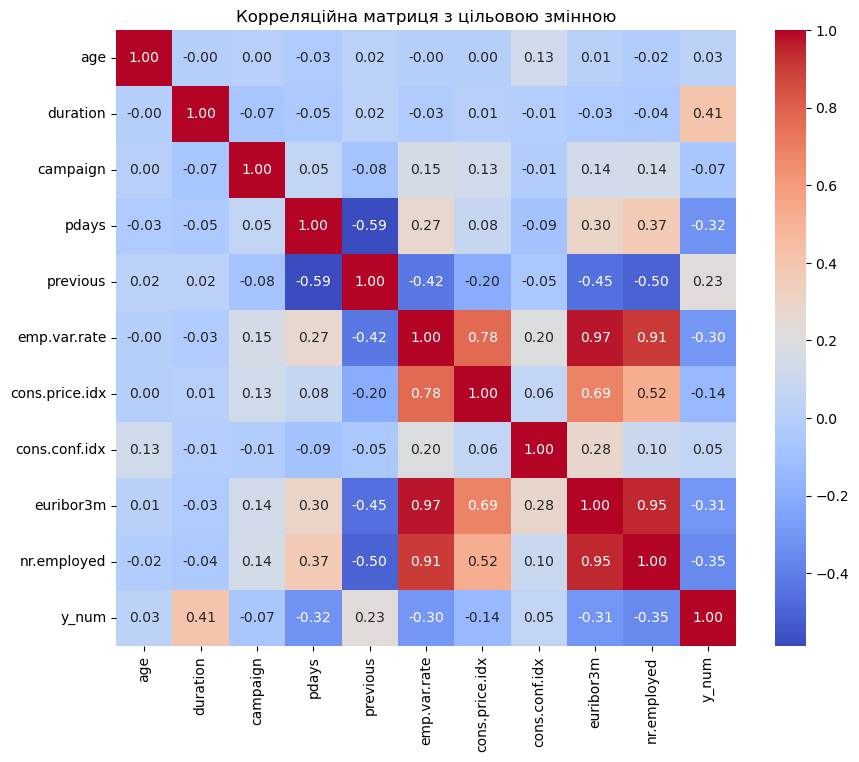

In [125]:
# Создаём копию датасета
df_corr = bank_df[num_cols].copy()

# Добавляем целевую переменную как 0/1
df_corr['y_num'] = bank_df['y'].map({'no':0, 'yes':1})

# Строим корреляционную матрицу
plt.figure(figsize=(10,8))
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляційна матриця з цільовою змінною")
plt.show()

З візуалізацій можна зробити висновки, що:
Люди старші 60 років більше схильні відкрити депозит
Як і очікувалось, тривалість дзвінка впливає на результат, приблизно від 200 до 1800 секунд найкращі результати
Більше погоджуються люди які контактували з банком від 1 до 3 разів
Найкраща кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії - від 2 до 7 днів

Вплив макроекономічних ознак:
Экономічні кризи (низький emp.var.rate, високий cons.conf.idx) повишають інтерес до депозитів.
Також є конкретні значення для цих ознак, при яких більше людей відмовляються від оформлення депозиту

З кореляційної матриці видно, що на цільову ознаку найбільше впливають:
duration, pdays, previous, emp.var.rate, euribor3m, nr.employed

## Аналіз категоріальних ознак

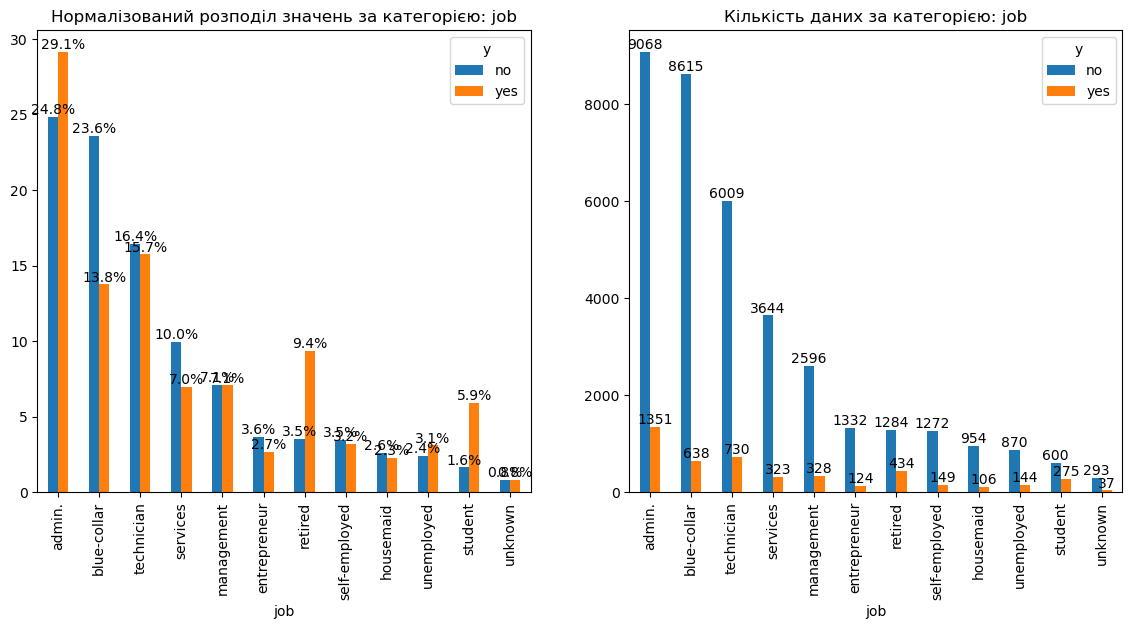

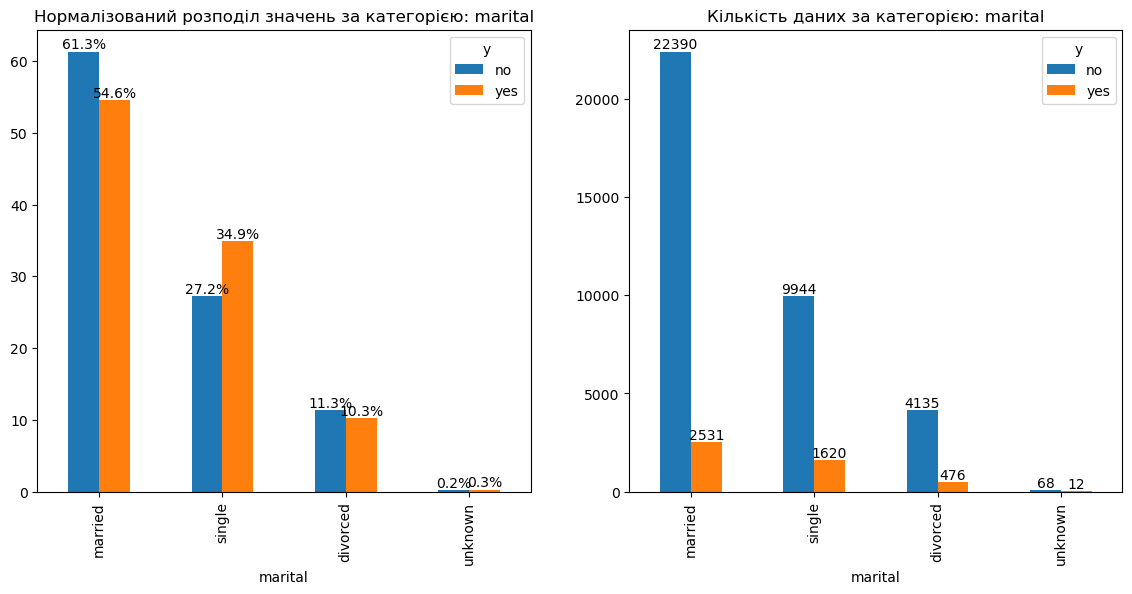

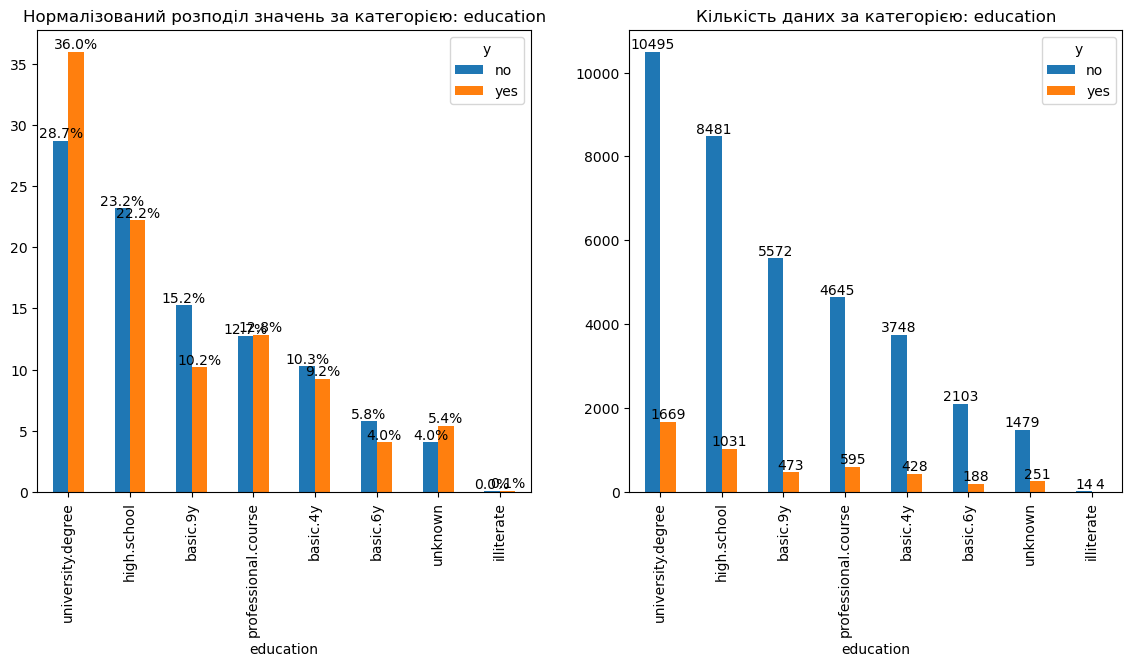

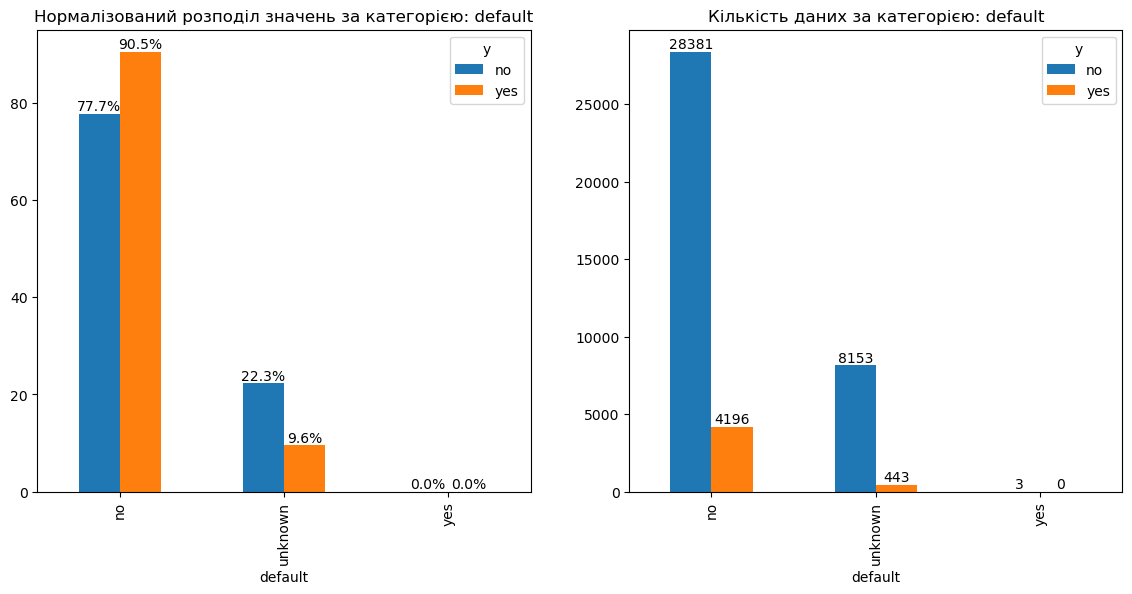

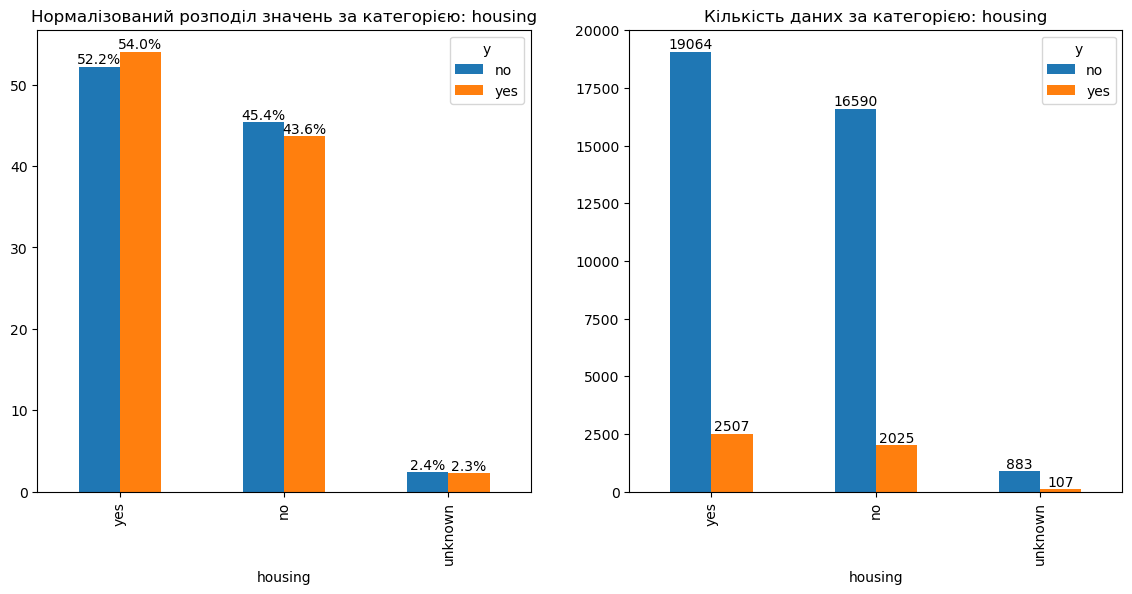

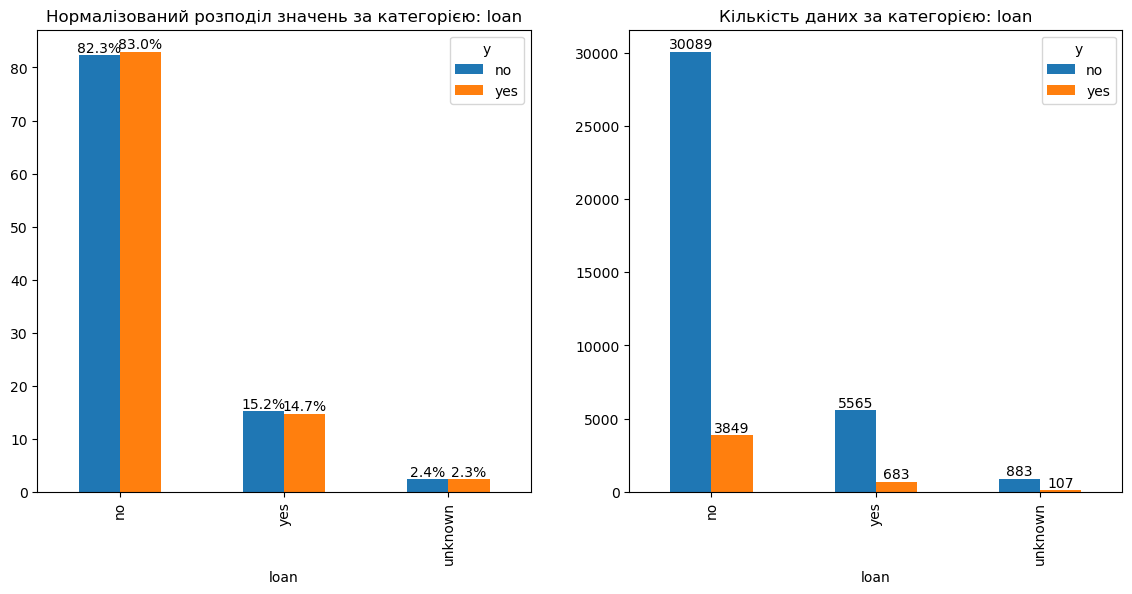

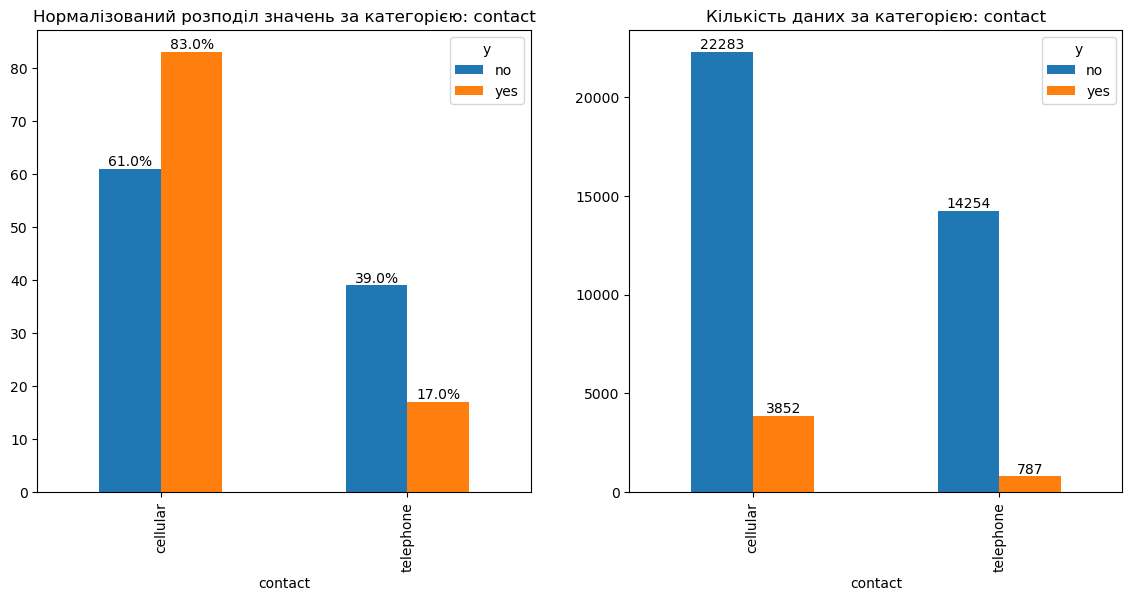

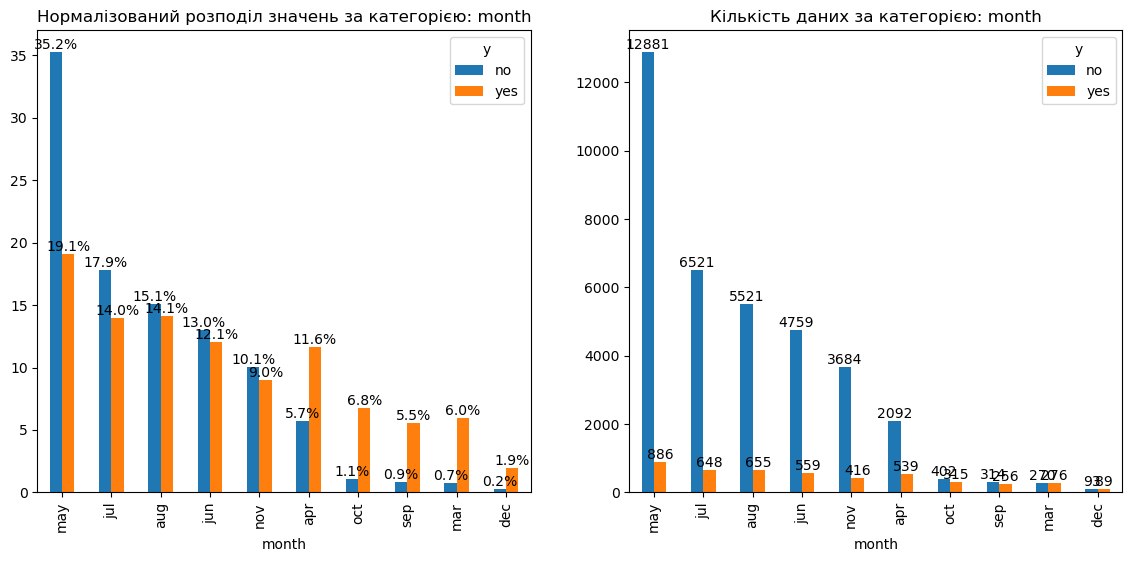

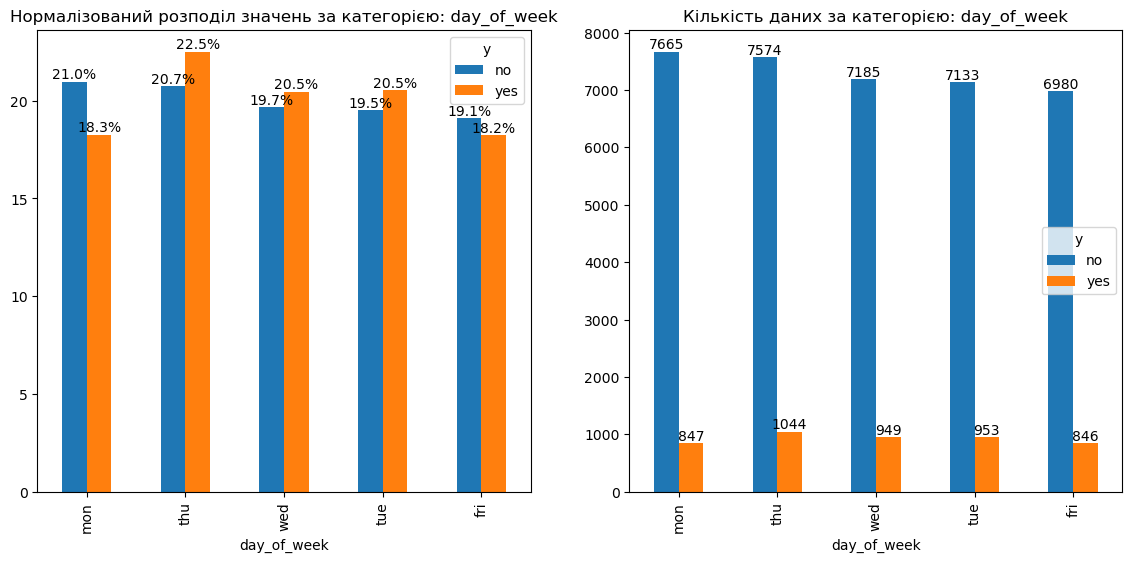

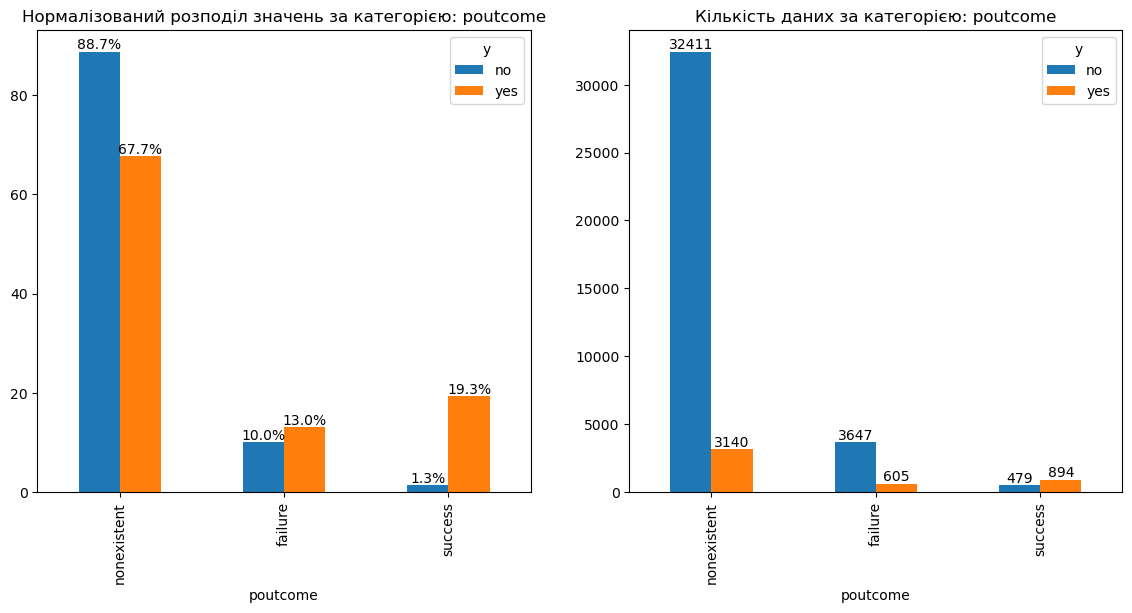

In [237]:
cat_cols = bank_df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('y') 

for col in cat_cols:
    eda.uni_cat_target_compare(bank_df, col)

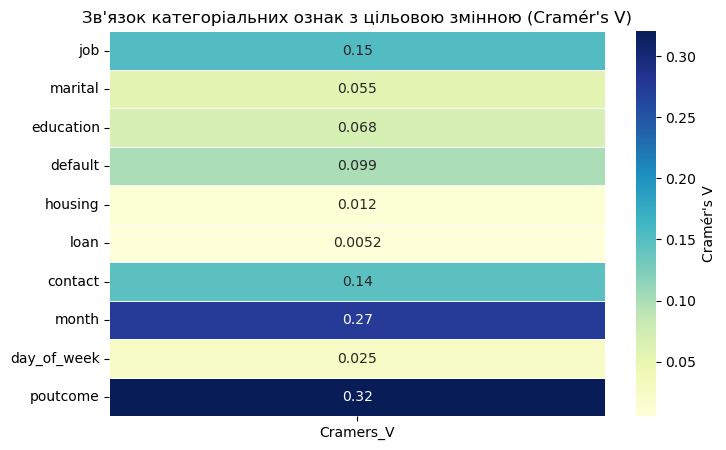

In [239]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    return np.sqrt(chi2 / (n * (min(table.shape)-1)))

cat_cols = bank_df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('y') 
cramers_dict = {col: cramers_v(bank_df[col], bank_df['y']) for col in cat_cols}

cramers_df = pd.DataFrame.from_dict(cramers_dict, orient='index', columns=['Cramers_V'])

plt.figure(figsize=(8, len(cat_cols)*0.5))
sns.heatmap(cramers_df, annot=True, cmap="YlGnBu", cbar_kws={'label': "Cramér's V"}, linewidths=0.5)
plt.title("Зв'язок категоріальних ознак з цільовою змінною (Cramér's V)")
plt.show()

Стосовно категоріальних ознак:
Більше схильні відкрити депозит люди які працюють адмінами, на пенсії та студенти. А також люди які одинокі, мають вищу освіту, чи їх рівнь освіти невідомий. Вони не мають заборгованості по кредиту. Цікаво, що люди які не повідомили про заборгований кредит не схильні відкривати депозит, а категорія з заборгованими кредитами майже відсутня. Виглядає ніби люди не люблять повідомляти про заборгованості :)
Також люди швидше погоджуються оформити депозит якщо дзвонити їм по сотовому телефону
Найбільш сприятливі місяці: квітень, вересень, жовтень та грудень
Найбільш дні тижня: вівторок, середа та четвер

Найбільш важливі ознаки за тестом Крамера: poutcome, mounth, job, contact, default